In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import openpyxl 

from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

#checkar esses:

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
#from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

#from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
df = pd.read_csv("clean_data.csv")

In [75]:
list(df.columns)

['id',
 'price',
 'living_area',
 'property_type',
 'rooms_number',
 'zip_code',
 'land_area',
 'garden',
 'garden_area',
 'equipped_kitchen',
 'full_address',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_area',
 'facades_number',
 'building_state',
 'lat',
 'lng',
 'province',
 'region',
 'building_condition']

,id,price,living_area,rooms_number,zip_code,land_area,garden,garden_area,equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_area,facades_number,building_state,lat,lng
id,1.000000,-0.107468,-0.023170,0.025120,0.029002,-0.034885,0.043745,-0.045187,0.030238,-0.019702,-0.004794,0.021088,-0.031508,-0.026085,0.059495,-0.060241,0.005573,-0.017466
price,-0.107468,1.000000,0.442626,0.417646,-0.145400,0.293829,0.045978,0.142675,-0.019895,0.289245,0.025558,0.146024,0.002056,0.081694,0.169743,0.182130,0.162182,-0.067297
living_area,-0.023170,0.442626,1.000000,0.509137,-0.048926,0.266545,0.103311,0.131799,0.017947,0.189902,-0.022969,0.149026,-0.053351,0.115761,0.194201,0.007319,-0.056643,0.063677
rooms_number,0.025120,0.417646,0.509137,1.000000,-0.059065,0.170583,0.218261,0.156601,0.024116,0.173813,-0.016621,0.139357,-0.073182,0.070572,0.259108,-0.065623,-0.127228,0.117006
zip_code,0.029002,-0.145400,-0.048926,-0.059065,1.000000,-0.007944,-0.088571,-0.022074,-0.021183,-0.045116,0.036065,-0.034591,-0.205406,-0.032772,-0.093532,0.006370,0.103193,-0.524438
land_area,-0.034885,0.293829,0.266545,0.170583,-0.007944,1.000000,0.031135,0.331662,0.019579,0.104126,-0.003509,0.032094,-0.038841,0.015032,0.110487,-0.006349,-0.019423,0.022573
garden,0.043745,0.045978,0.103311,0.218261,-0.088571,0.031135,1.000000,0.139129,0.072048,0.090891,-0.044031,0.071550,0.197896,0.069387,0.204456,-0.049865,-0.138023,0.171194
garden_area,-0.045187,0.142675,0.131799,0.156601,-0.022074,0.331662,0.139129,1.000000,0.019536,0.078494,-0.008324,0.024109,0.009542,0.040742,0.084506,0.010900,-0.029449,0.032879
equipped_kitchen,0.030238,-0.019895,0.017947,0.024116,-0.021183,0.019579,0.072048,0.019536,1.000000,0.025039,-0.001898,0.054890,0.080662,0.014710,0.058252,-0.010638,0.010755,0.011686
swimming_pool,-0.019702,0.289245,0.189902,0.173813,-0.045116,0.104126,0.090891,0.078494,0.025039,1.000000,-0.000954,0.113868,0.011318,0.026712,0.163255,0.065066,-0.008345,0.023637


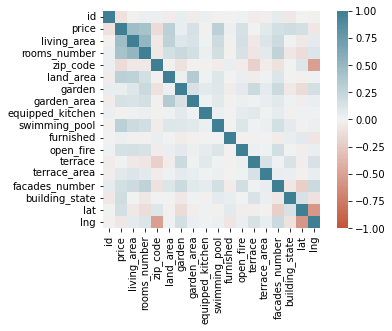

In [76]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr

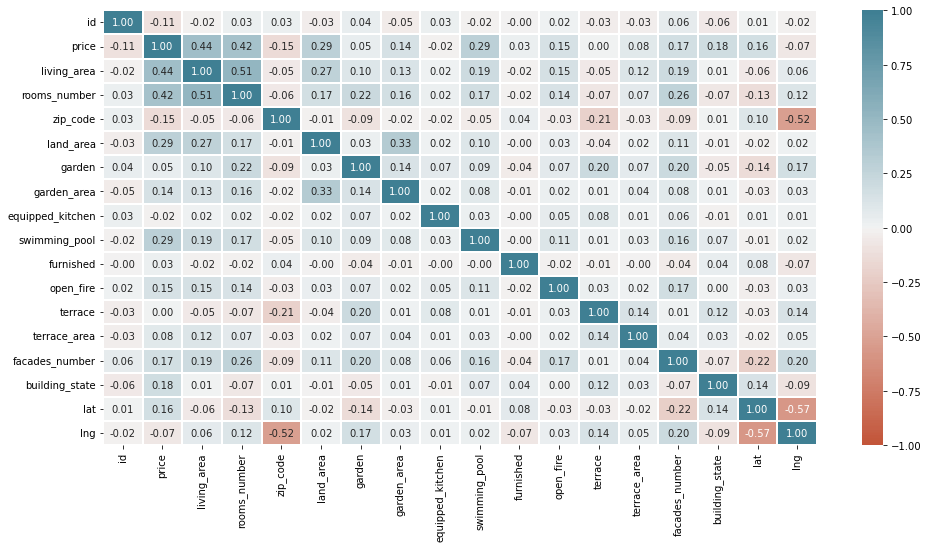

In [77]:
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

## Linear regression

In [78]:
#LinerRegression model: only variables with >0.2 of correlation

y= np.array(df['price']).reshape(-1,1)
X= df.drop(['id','price','full_address', 'property_type', 'zip_code','garden','garden_area','equipped_kitchen','furnished', 
            'open_fire', 'terrace_area', 'terrace', 'facades_number', 'building_state','province', 'region', 'building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

MSE :  212729847809.08786
RMSE :  461226.4604389994
Score: 0.3606332703513708


In [79]:
# LinerRegression model: Price vs Area
X= np.array(df['living_area']).reshape(-1,1)
y= np.array(df['price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

MSE:  275203523214.1461
RMSE:  524598.439965414
Score: 0.21851453428766088


In [80]:
# LinerRegression model: Price vs Rooms number

X= np.array(df['rooms_number']).reshape(-1,1)
y= np.array(df['price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

MSE:  260331040857.15253
RMSE:  510226.4603655445
Score: 0.1679814181403806


In [81]:
#split dataframe in Houses x Apartments
df_house= df[df['property_type'] == 'house']
df_apt = df[df['property_type'] == 'apartment']
print(df_house.shape)
print(df_apt.shape)

(7053, 23)
(6560, 23)


## Houses

In [82]:
#LinearRegression model for HOUSES
from sklearn.model_selection import cross_val_score
y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id','price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
#cross_val_score(model,X,y, cv=10)
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_test, y_test))


MSE:  173907064165.81662
RMSE:  417021.65910875256
Score: 0.4493763945319226


## Apartments

In [83]:
#LinearRegression model for APARTMENTS

y= np.array(df_apt['price']).reshape(-1,1)
X= df_apt.drop(['id','price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_test, y_test))

MSE:  138644796592.63678
RMSE:  372350.36805760884
Score: 0.318495450093219


In [84]:
#Multiple Linear Regression 
y= np.array(df['price']).reshape(-1,1)
X= df.drop(['id','price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)
print('Score: ', mlr_score)
print('MSE: ', mean_squared_error(y_test,pred_mlr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_mlr)))

Score:  0.37214375711533565
MSE:  200526063408.47235
RMSE:  447801.3660189888


## Linear regression with Cross validation 

In [85]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import datasets

In [86]:
import warnings
warnings.filterwarnings("ignore")

Score 0.5237629129621131
MSE:  143018231153.48178
RMSE:  378177.512754899


Text(0.5, 1.0, 'Linear Regression with Cross validation')

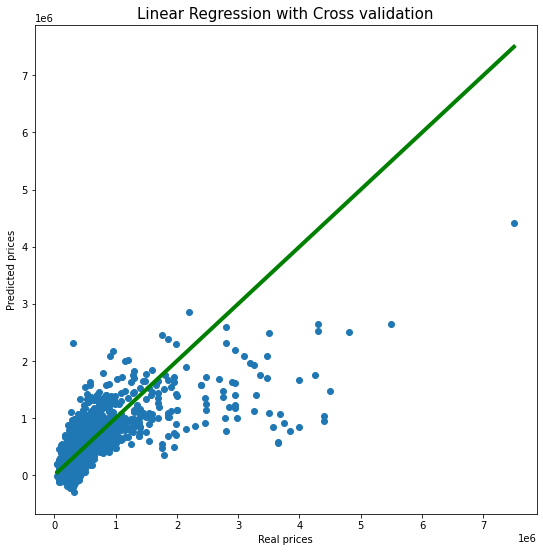

In [87]:
y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 35)


lr_model = LinearRegression()
parameters = {'normalize':[True,False]}
clf = GridSearchCV(lr_model, parameters, refit=True, cv=10)
best_model = clf.fit(X_train,y_train)
clf_score = clf.score(X_test,y_test)
pred = best_model.predict(X_test)
print('Score', clf_score)
print('MSE: ', mean_squared_error(y_test,pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred)))

fig = plt.subplots(figsize = (9, 9))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g', lw=4)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Linear Regression with Cross validation", size=15)



## Decision Tree

In [88]:
#Decision Tree

df_house= df[df['property_type'] == 'house']
df_apt = df[df['property_type'] == 'apartment']

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id','price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
print('Score:', decision_score)
expl_tr = explained_variance_score(pred_tr,y_test)
print('MSE: ', mean_squared_error(y_test,pred_tr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_tr)))


Score: 0.6662909595680069
MSE:  105397514619.42053
RMSE:  324649.8338509055


## Random Forest

MSE:  54046685686.91773
RMSE:  232479.430674883
Score: 0.8288776762503698


Text(0.5, 1.0, 'Random Forest')

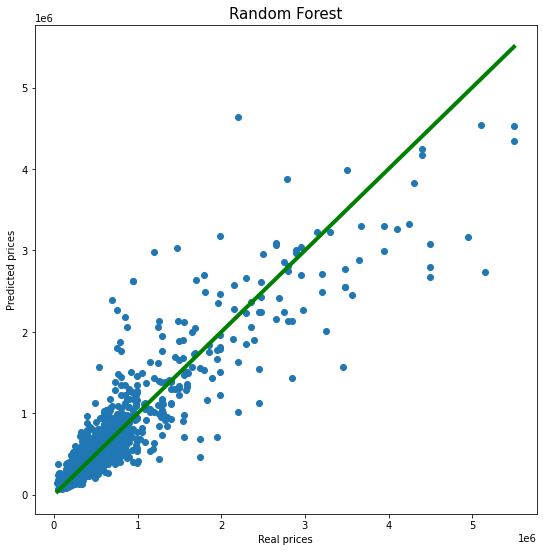

In [89]:
#Random Forest Model 

df_house= df[df['property_type'] == 'house']
df_apt = df[df['property_type'] == 'apartment']

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

house_data = {'area' :[1270],'rooms-number' :[4],'zip-code' :[5101],'land-area':[1270],'garden':[1],'garden-area':[1270],'equipped-kitchen':[1],'swimming-pool':[0],'furnished':[0],'open-fire':[1],'terrace':[1],'terrace-area':[30],'facades-number':[4],'building-state':[1],'code':[5101],'lat':[504516025],'lng':[49050011]}
test_df = pd.DataFrame(house_data)

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
print('MSE: ', mean_squared_error(y_test,rf_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Score:', rf_score)


import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (9, 9))

plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g', lw=4)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Random Forest", size=15)


## Gradient Boosting Regressor

MSE:  58059428015.01197
RMSE:  240955.2406879999
Score: 0.8161725532060127


Text(0.5, 1.0, 'Gradient Boosting Regressor')

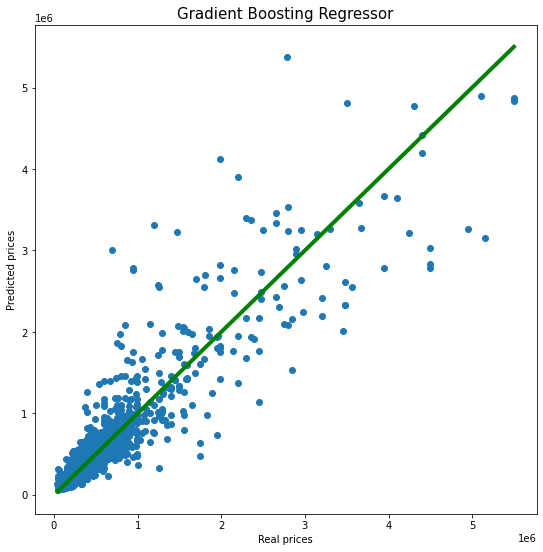

In [90]:
# Gradient Boosting Regressor
from sklearn import ensemble

df_house= df[df['property_type'] == 'house']
df_apt = df[df['property_type'] == 'apartment']

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)


clf = ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=6,min_samples_split=2,learning_rate=0.1,loss= 'squared_error')
clf.fit(X_train,y_train)
GBRscore = clf.score(X_test,y_test)
pred = clf.predict(X_test)

print('MSE: ', mean_squared_error(y_test,pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred)))
print('Score:', GBRscore)

import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (9, 9))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g', lw=4)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Gradient Boosting Regressor", size=15)




## SVR Support Vector Regressor model

In [91]:
#SVR Support Vector Regressor model
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, svm

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=42) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
SVR_score = clf.score(X_test, y_test)
mse_SVR = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_SVR}")
print("Score:", SVR_score)


MSE: 218902566886.86255
Score: 0.03565292096219931


## Ridge model

In [92]:
# Ridge model
from sklearn.linear_model import Ridge 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
scoreRidge = ridge.score(X_test,y_test)
print(f'Score: {scoreRidge}')

Score: 0.4493295114290373


In [93]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

## Bayesian model

In [94]:
# Bayesian model
from sklearn.linear_model import BayesianRidge 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
scoreBaesian = bayesian.score(X_test,y_test)
print(f'Score: {scoreBaesian}')

Score: 0.4477986554414267


## ElasticNet model 

In [95]:
# ElasticNet model 
from sklearn.linear_model import ElasticNet 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
scoreelastic = en.score(X_test,y_test)
print(f'the accuracy is {scoreelastic}')

the accuracy is 0.44719646831731397


## Lasso model

In [96]:
#Lasso model 
from sklearn.linear_model import Lasso 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property_type', 'full_address', 'province', 'region','building_condition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("Train score: {}".format(train_score_ls))
print("Test score: {}".format(test_score_ls))

Train score: 0.5417901124932849
Test score: 0.4493579411968276


In [97]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','Support Vector Regressor', 'Lasso model','Elastic Net model', 'Bayesian Model', 'Ridge Model', 'Suport Vector Machine Model', 'Gradient Boosting Regressor'],
                            'Score':[mlr_score,decision_score,rf_score,clf_score,test_score_ls, scoreelastic, scoreBaesian,  scoreRidge, SVR_score, GBRscore]
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score
2,Random forest Regression,0.828878
9,Gradient Boosting Regressor,0.816173
1,Decision Tree,0.666291
3,Support Vector Regressor,0.523763
4,Lasso model,0.449358
7,Ridge Model,0.449330
6,Bayesian Model,0.447799
5,Elastic Net model,0.447196
0,Multiple Linear Regression,0.372144
8,Suport Vector Machine Model,0.035653
